In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

### Naive Multiclass Model

In [33]:
x = np.memmap('data/gray_data_360', mode='r', shape = (150000,360))
y = np.memmap('data/image_target.npy', mode='r', shape = (150000,))
x_val = np.memmap('data/test_gray_data_360.npy', mode='r', shape = (50000,360))
y_val = np.memmap('data/test_target.npy', mode='r', shape = (50000))
print(x.shape)
print(y.shape)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x = x/255
x_val = x_val/255

(150000, 360)
(150000,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y[0], test_size=0.2, stratify=y[0])
print(X_train.shape)

(120000, 360)


In [35]:
clf = LogisticRegression(max_iter=200).fit(X_train, y_train)

print(clf.score(X_test, y_test))
confusion_matrix(y_test, clf.predict(X_test))

0.22713333333333333


array([[1337, 1213, 1134, 1126, 1190],
       [1096, 1448, 1155, 1133, 1168],
       [1200, 1195, 1348, 1101, 1156],
       [1182, 1200, 1122, 1351, 1145],
       [1183, 1190, 1173, 1124, 1330]])

In [36]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
print(clf.score(x_val, y_val))
y_predict = (clf.predict(x_val))

print(f'F1 Score:\t{f1_score(y_val, y_predict, average=None)}')

0.2238
F1 Score:	[0.21857923 0.22709437 0.22390606 0.22256175 0.22674361]


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.53374805

### Naive Binary Model

In [26]:
x = np.memmap('data/gray_data_360', mode='r', shape = (150000,360))
# x = np.load('data/gray_data_20')
y = np.memmap('data/image_target.npy', mode='r', shape = (150000,))
x_val = np.memmap('data/test_gray_data_360.npy', mode='r', shape = (50000,360))
y_val = np.memmap('data/test_target.npy', mode='r', shape = (50000))
print(x.shape)
print(y.shape)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y = y == 2
y = y.astype(int)
y_val = y_val == 2
y_val = y_val.astype(int)
x = x/255
x_val = x_val/255

(150000, 360)
(150000,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y[0], test_size=0.2, stratify=y[0])
print(X_train.shape)

(120000, 360)


In [28]:
clf = LogisticRegression(max_iter=200).fit(X_train, y_train)

print(clf.score(X_test, y_test))
confusion_matrix(y_test, clf.predict(X_test))

0.8037


array([[24000,     0],
       [ 5889,   111]])

In [29]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
print(clf.score(x_val, y_val))
# y_predict = (clf.predict(x_val))
y_predict = (clf.predict_proba(x_val)[:,1] > 0.3)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))
# y_predict

print(f'F1 Score:\t{f1_score(y_val, y_predict, average=None)}')

0.8043
Precision: 0.5130,   Recall: 0.0356
F1 Score:	[0.88822699 0.06657939]


Text(0.5, 1.0, 'Precision and Recall Curves')

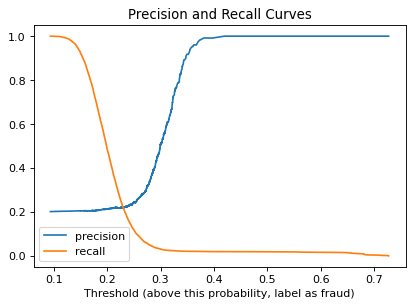

In [32]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)')
plt.title('Precision and Recall Curves')

In [30]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['non', 'IDR'],
           yticklabels=['non', 'IDR']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [31]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…